# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [1]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/drive/MyDrive/assignment4"
if not os.path.exists(datadir):
  !ln -s "./assignment4" $datadir # TODO: Fill your Assignment 4 path
os.chdir(datadir)
!pwd

/content/drive/MyDrive/assignment4


# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [4]:
from gan.train import train
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss
from gan.utils import show_images

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


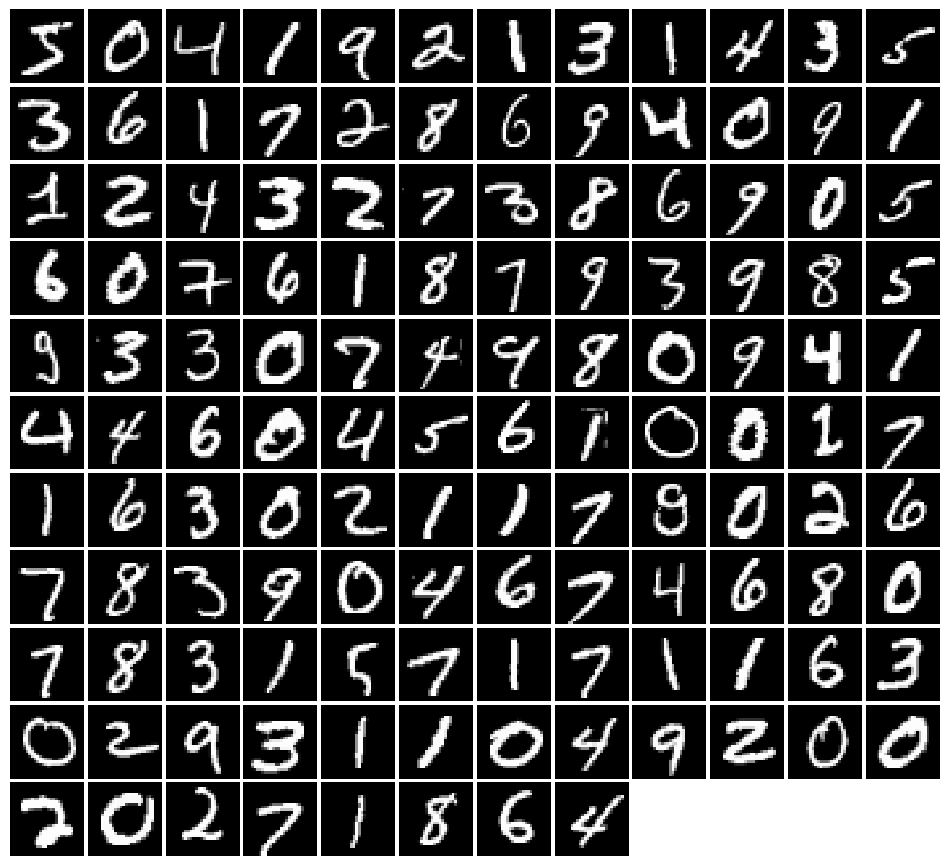

In [6]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

# Discriminator and Generator


In [7]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [8]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [9]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """

    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 0, D: 1.398, G:0.7106


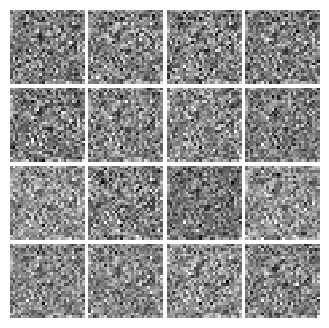


Iter: 250, D: 1.403, G:0.7773


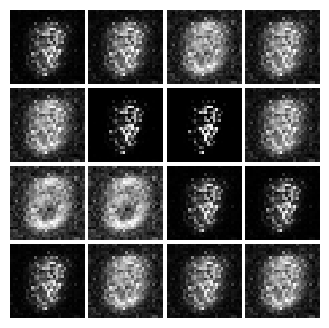


EPOCH:  2


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 500, D: 2.06, G:2.198


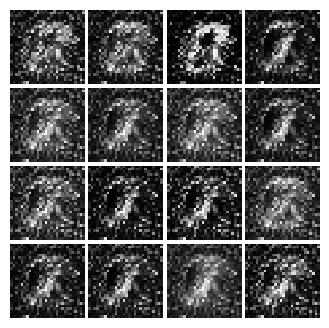


Iter: 750, D: 1.136, G:1.938


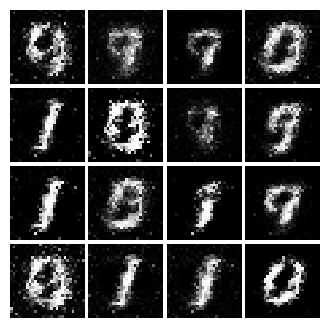


EPOCH:  3


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 1000, D: 0.9097, G:1.408


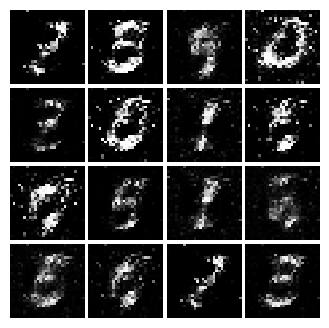


Iter: 1250, D: 1.094, G:0.9397


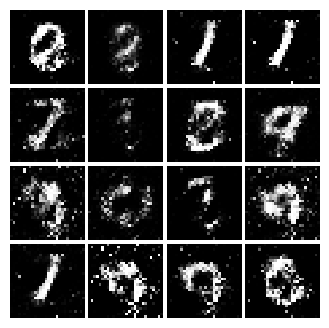


EPOCH:  4


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 1500, D: 1.275, G:0.944


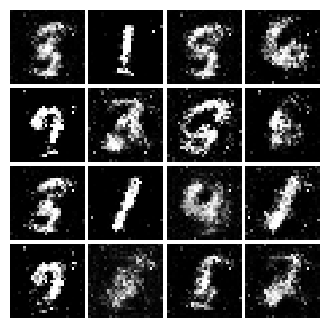


Iter: 1750, D: 1.431, G:1.174


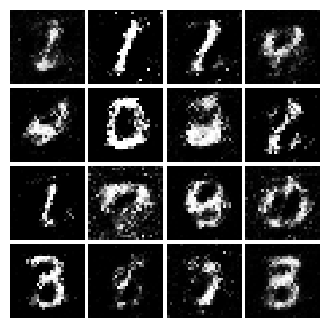


EPOCH:  5


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 2000, D: 1.261, G:0.9126


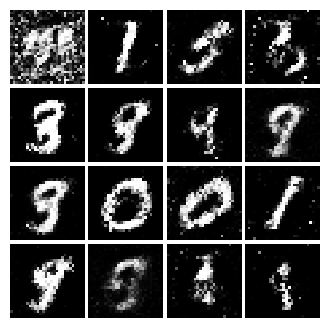


Iter: 2250, D: 1.237, G:0.8935


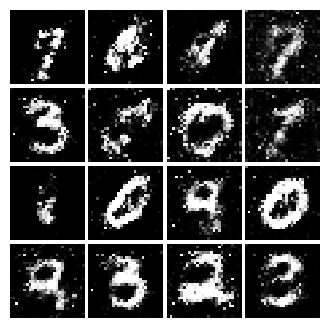


EPOCH:  6


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 2500, D: 1.156, G:1.126


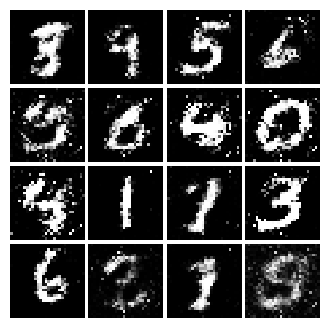


Iter: 2750, D: 1.204, G:0.7448


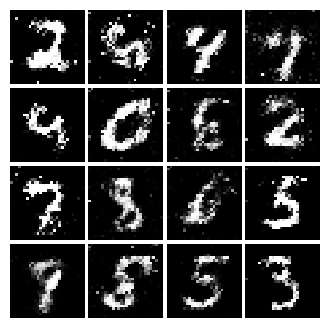


EPOCH:  7


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3000, D: 1.251, G:0.9805


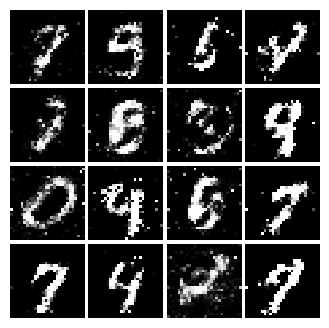


Iter: 3250, D: 1.178, G:0.9793


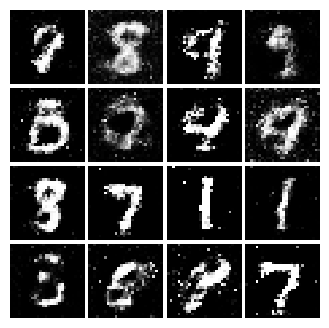


EPOCH:  8


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3500, D: 1.388, G:0.8246


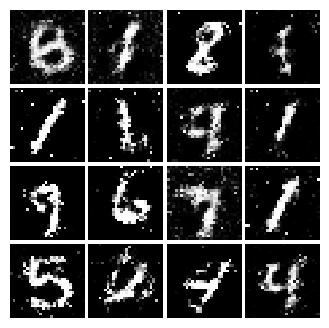


EPOCH:  9


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3750, D: 1.337, G:0.9818


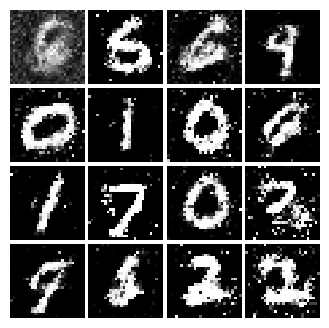


Iter: 4000, D: 1.313, G:0.8726


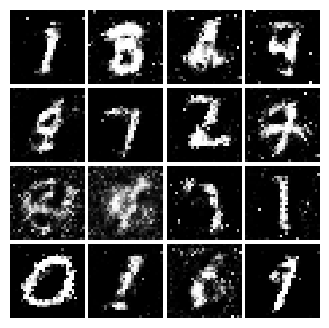


EPOCH:  10


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 4250, D: 1.265, G:0.8401


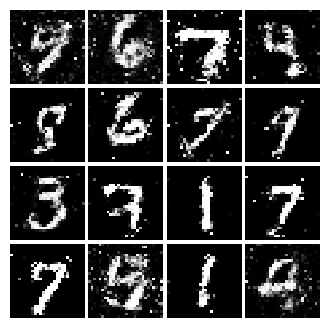


Iter: 4500, D: 1.357, G:0.8262


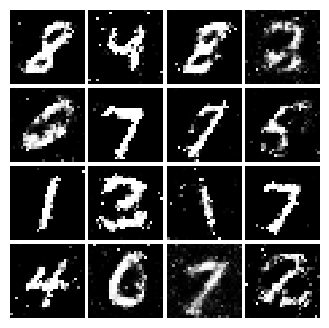

In [11]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 0, D: 0.4462, G:0.4777


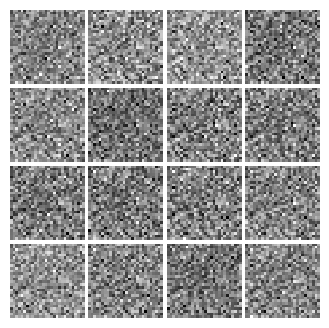


Iter: 250, D: 0.1509, G:0.0887


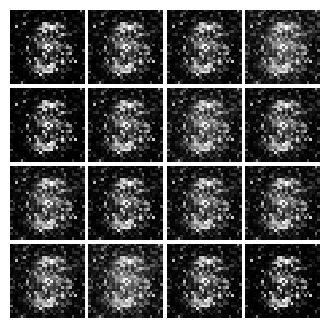


EPOCH:  2


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 500, D: 0.1356, G:0.1746


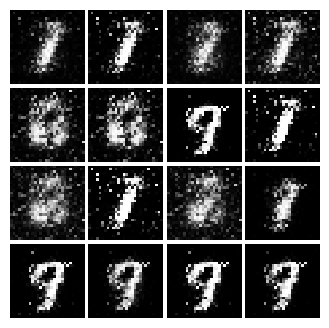


Iter: 750, D: 0.1298, G:0.4908


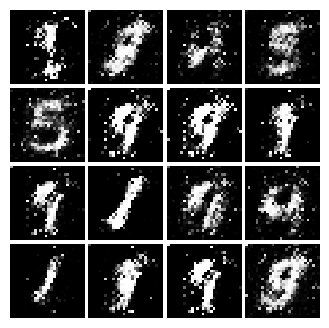


EPOCH:  3


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 1000, D: 0.1468, G:0.2941


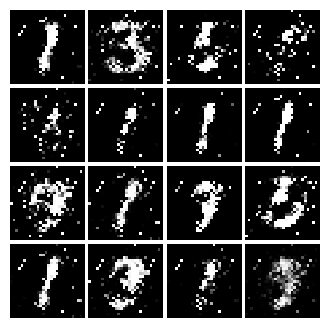


Iter: 1250, D: 0.1407, G:0.2522


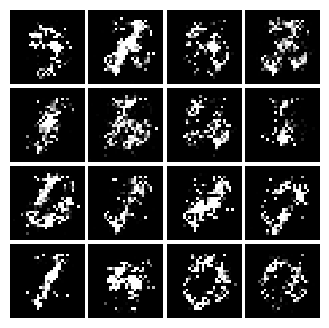


EPOCH:  4


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 1500, D: 0.1556, G:0.1603


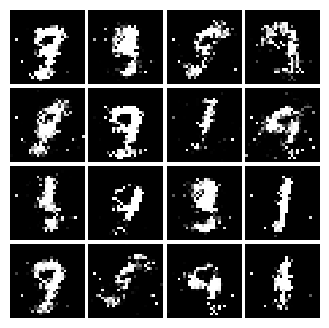


Iter: 1750, D: 0.2062, G:0.246


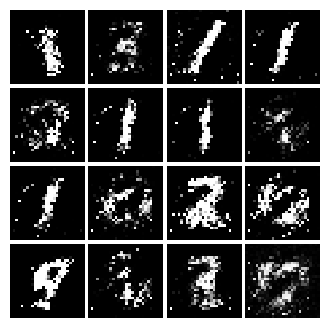


EPOCH:  5


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 2000, D: 0.183, G:0.2221


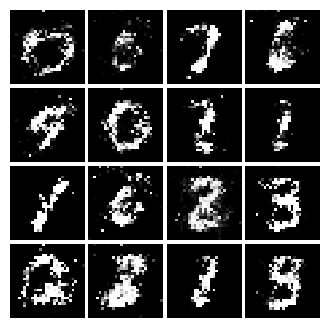


Iter: 2250, D: 0.205, G:0.1839


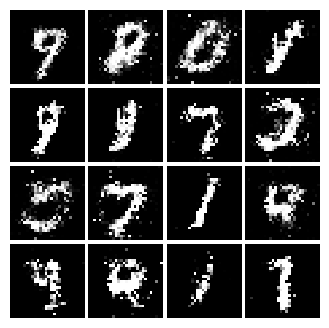


EPOCH:  6


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 2500, D: 0.2065, G:0.2356


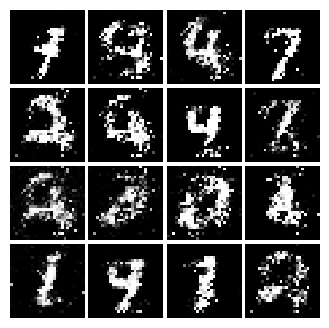


Iter: 2750, D: 0.2402, G:0.166


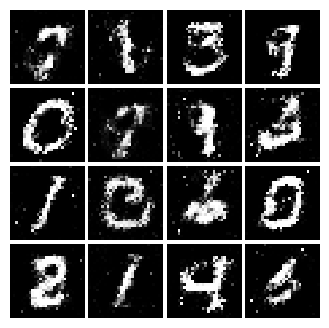


EPOCH:  7


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3000, D: 0.1956, G:0.2073


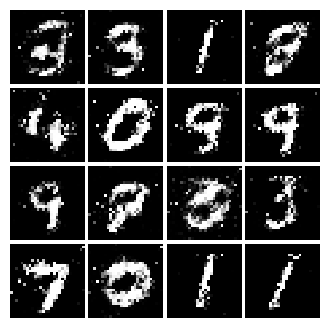


Iter: 3250, D: 0.212, G:0.1542


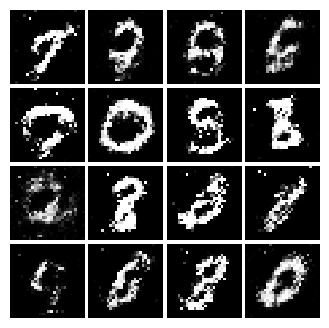


EPOCH:  8


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3500, D: 0.2233, G:0.1841


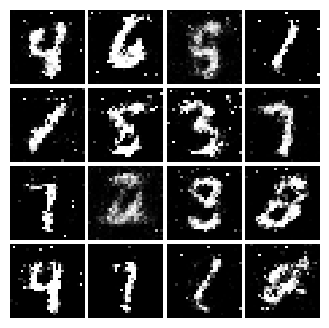


EPOCH:  9


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 3750, D: 0.2167, G:0.2193


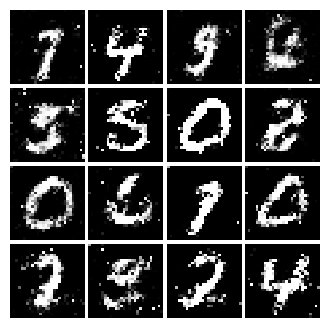


Iter: 4000, D: 0.2088, G:0.1882


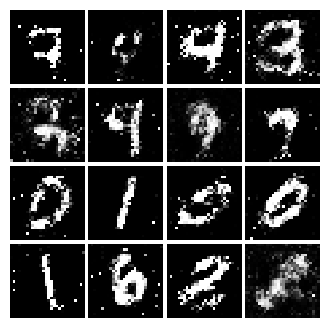


EPOCH:  10


  0%|          | 0/468 [00:00<?, ?it/s]

Iter: 4250, D: 0.2337, G:0.1935


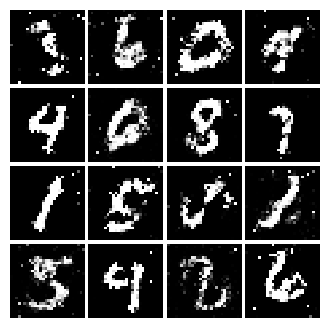


Iter: 4500, D: 0.224, G:0.1784


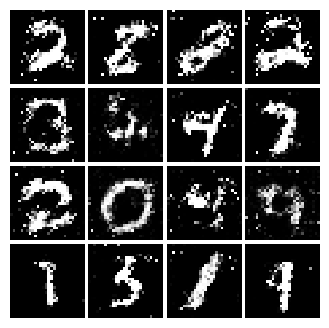

In [12]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)